Dataset shape: (1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0



Missing values per column:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

Encoded columns:
 Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'target', 'sex_Male', 'chest_pain_type_Atypical angina',
       'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina',
       'fasting_blood_sugar_Lower than 120 mg/ml', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'exercise_induced_angina_Yes',
       'slope_Flat', 'slope_Upsloping', 'vessels_colored_by_flourosopy_One',
     

/tmp/ipython-input-3948200044.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipython-input-3948200044.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

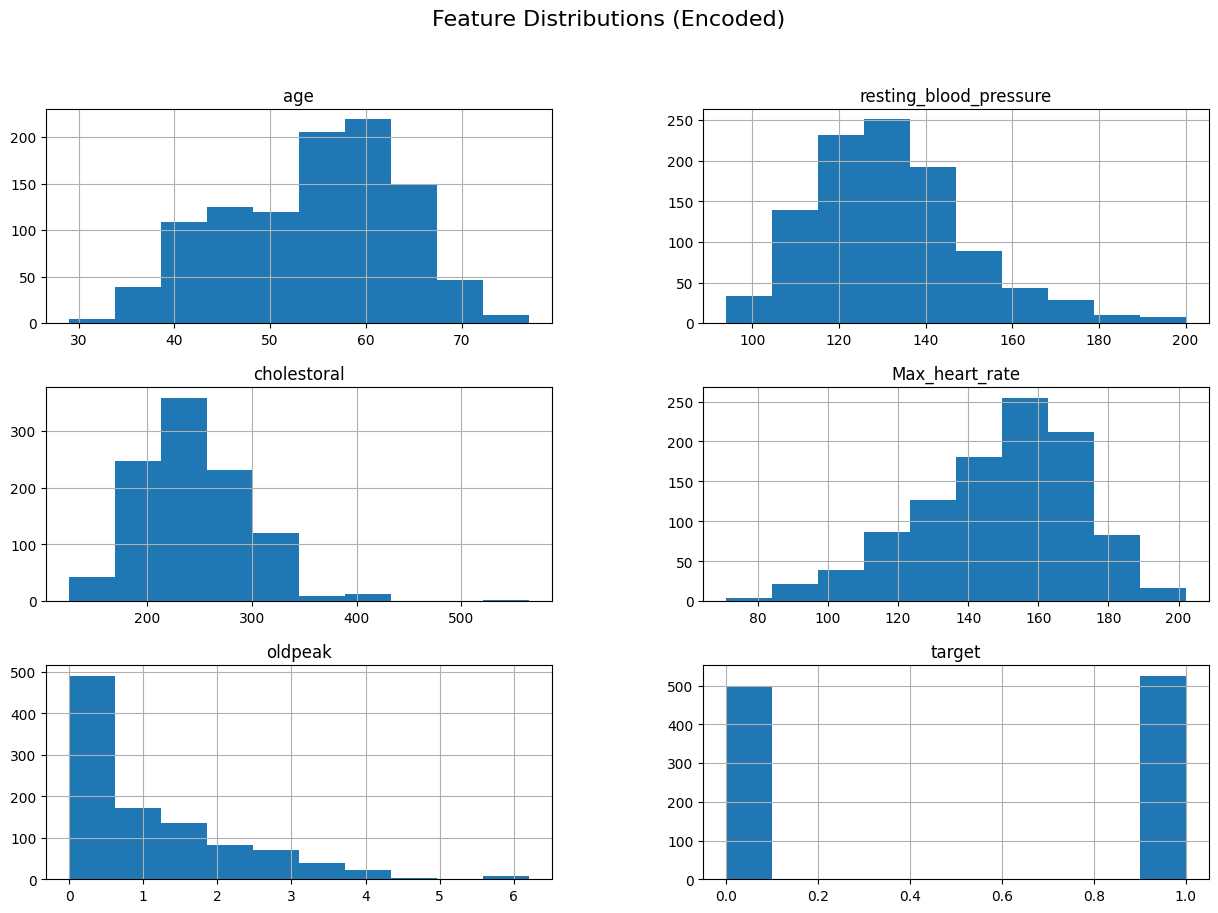

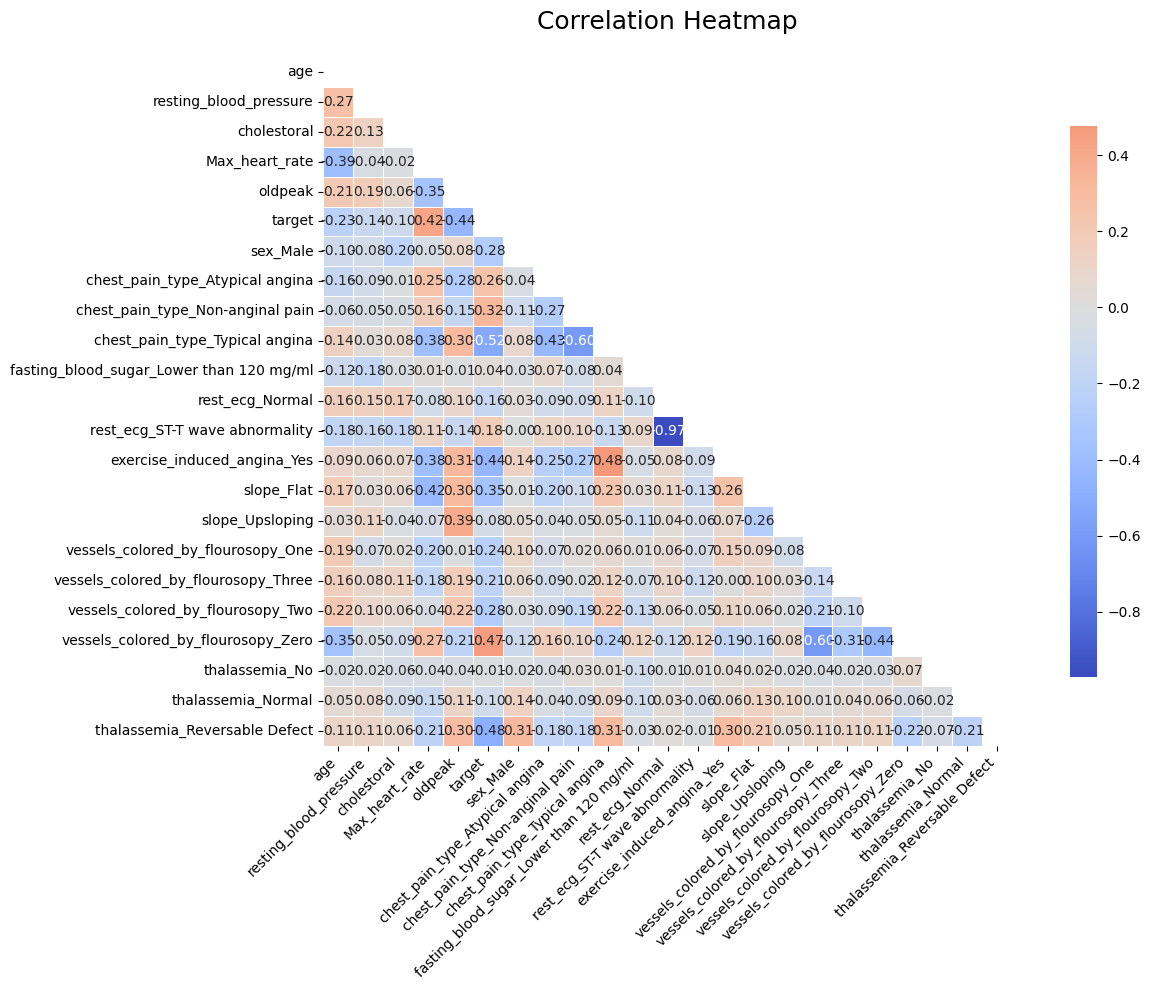

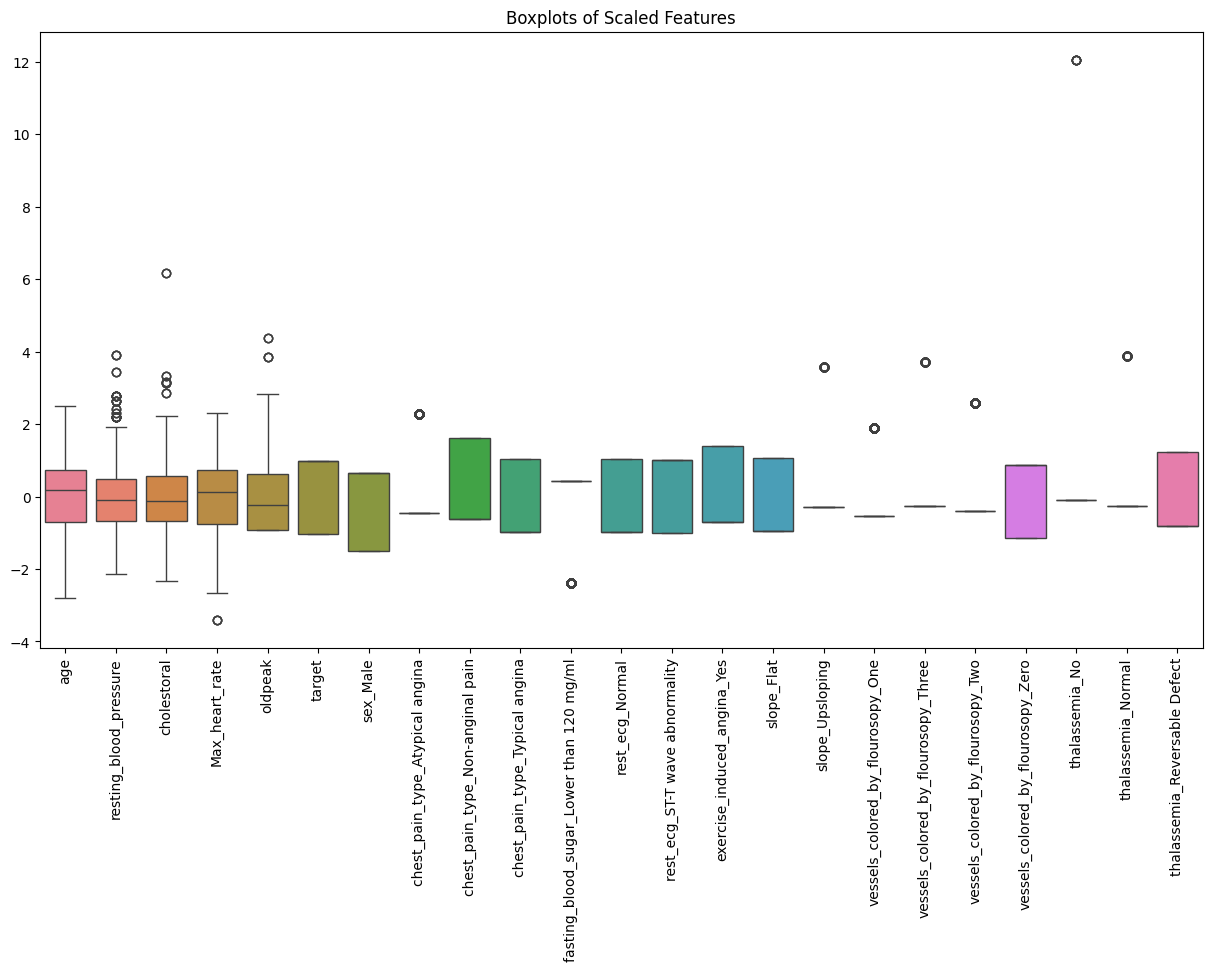

✅ Cleaned dataset saved as 'cleaned_heart_disease.csv'
✅ Scaled dataset saved as 'scaled_heart_disease.csv'


In [ ]:
# Data Preprocessing & Cleaning Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# === Load Raw Dataset ===
data = pd.read_csv("HeartDiseaseTrain-Test.csv")
print("Dataset shape:", data.shape)
display(data.head())

# Check Missing Values
print("\nMissing values per column:\n", data.isnull().sum())

# Fill missing values
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

#  Encoding Categorical Variables
data_encoded = pd.get_dummies(data, drop_first=True)
print("\nEncoded columns:\n", data_encoded.columns)

#  Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded)
data_scaled = pd.DataFrame(scaled_features, columns=data_encoded.columns)

# Exploratory Data Analysis (EDA)
# Histograms
data_encoded.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions (Encoded)", fontsize=16)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
corr = data_scaled.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=18, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_scaled)
plt.title("Boxplots of Scaled Features")
plt.xticks(rotation=90)
plt.show()

#  Save Cleaned Dataset
data_encoded.to_csv("cleaned_heart_disease.csv", index=False)  # encoded dataset for feature selection & tuning
data_scaled.to_csv("scaled_heart_disease.csv", index=False)    # scaled dataset for modeling if needed
print(" Cleaned dataset saved as 'cleaned_heart_disease.csv'")
print(" Scaled dataset saved as 'scaled_heart_disease.csv'")
